In [1]:
import numpy as np
import pandas as pd

In [2]:
with open("u.data") as f:
    data = f.readlines()

In [3]:
# user id | item id | rating | timestamp. 
data[:3]

['196\t242\t3\t881250949\n',
 '186\t302\t3\t891717742\n',
 '22\t377\t1\t878887116\n']

In [4]:
data[0].split()

['196', '242', '3', '881250949']

In [5]:
# if rating >= 4 -> likes
from collections import defaultdict

data_dict = defaultdict(list)

for line in data:
    line_split = line.split()
    uid = line_split[0].strip()
    rate = int(line_split[2])
    film_id = line_split[1].strip()
    
    if rate >= 4:
        data_dict[uid].append(film_id)
    

In [6]:
len(data_dict) #942 users in dataset

942

In [7]:
list(data_dict.keys())[:10]

['298', '253', '286', '200', '122', '291', '119', '167', '299', '308']

In [8]:
np.mean(list(map(lambda v: len(v),data_dict.values()))) #avg num of films this person liked

58.78450106157113

In [28]:
np.median(list(map(lambda v: len(v),data_dict.values()))) 

39.5

In [29]:
np.std(list(map(lambda v: len(v),data_dict.values()))) 

54.667623888448

<AxesSubplot:>

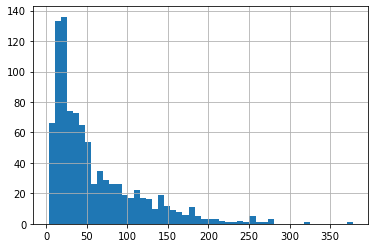

In [35]:
pd.Series(list(map(lambda v: len(v),data_dict.values()))).hist(bins = 50)

<AxesSubplot:>

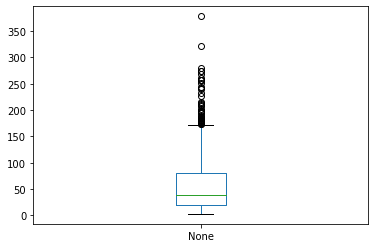

In [36]:
pd.Series(list(map(lambda v: len(v),data_dict.values()))).plot(kind = "box")

In [9]:
test_keys = np.random.choice(list(list(data_dict.keys())), int(len(list(data_dict.keys())) * 0.1))

In [10]:
train_keys = list(set(list(data_dict.keys())) - set(test_keys))

In [11]:
len(train_keys)

852

In [12]:
len(test_keys)

94

In [13]:
train_data_dict = {k: data_dict[k] for k in train_keys}
test_data_dict = {k: data_dict[k] for k in test_keys}

In [14]:
pd.to_pickle(train_data_dict, "train_data_dict_ml100k.pkl") # user ids to likes (gte 4 rate)
pd.to_pickle(test_data_dict, "test_data_dict_ml100k.pkl")

In [15]:
from tqdm import tqdm as tn

In [16]:
all_likes_set = set() 
for l in train_data_dict.values():
    all_likes_set.update(l)
len(all_likes_set)

1439

In [17]:
from gensim.test.utils import get_tmpfile
from gensim.models.callbacks import CallbackAny2Vec

class EpochLogger(CallbackAny2Vec):
    '''Callback to log information about training'''

    def __init__(self):
        self.epoch = 0
    
    def on_epoch_begin(self, model):
        print("Epoch #{} start".format(self.epoch))

    def on_epoch_end(self, model):
        print("Epoch #{} end".format(self.epoch))
        self.epoch += 1

In [18]:
class EpochSaver(CallbackAny2Vec):
    '''Callback to save model after each epoch.'''

    def __init__(self):
        self.epoch = 0

    def on_epoch_end(self, model):
        model.save("word2vec_ml00k_epoch.model")
        model.wv.save("vectors_ml100k_epoch.kv")
        self.epoch += 1

In [19]:
import pandas as pd

In [20]:
len(train_data_dict.values())

852

In [21]:
import random
a = [1,2,3]
random.shuffle(a)
a

[1, 3, 2]

In [ ]:
from tqdm import tqdm as tn

In [49]:
#twice more random shuffles
shuffled_sents = []
for _ in tn(list(range(30))):
    for sent in list(train_data_dict.values()):
        
        random.shuffle(sent)
        shuffled_sents.append(sent)

100%|██████████| 30/30 [00:00<00:00, 33.82it/s]


In [50]:
len(shuffled_sents)

25560

In [51]:
epoch_logger = EpochLogger()
epoch_saver = EpochSaver()

from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
model = Word2Vec(sentences = shuffled_sents, size=100, window=40, min_count=1, workers=4, callbacks=[epoch_logger, epoch_saver], iter=50)
model.save("word2vec_ml100k_30shufs.model")

word_vectors = model.wv
word_vectors.save("ml100k_vectors_30shufs.kv")

Epoch #0 start
Epoch #0 end
Epoch #1 start
Epoch #1 end
Epoch #2 start
Epoch #2 end
Epoch #3 start
Epoch #3 end
Epoch #4 start
Epoch #4 end
Epoch #5 start
Epoch #5 end
Epoch #6 start
Epoch #6 end
Epoch #7 start
Epoch #7 end
Epoch #8 start
Epoch #8 end
Epoch #9 start
Epoch #9 end
Epoch #10 start
Epoch #10 end
Epoch #11 start
Epoch #11 end
Epoch #12 start
Epoch #12 end
Epoch #13 start
Epoch #13 end
Epoch #14 start
Epoch #14 end
Epoch #15 start
Epoch #15 end
Epoch #16 start
Epoch #16 end
Epoch #17 start
Epoch #17 end
Epoch #18 start
Epoch #18 end
Epoch #19 start
Epoch #19 end
Epoch #20 start
Epoch #20 end
Epoch #21 start
Epoch #21 end
Epoch #22 start
Epoch #22 end
Epoch #23 start
Epoch #23 end
Epoch #24 start
Epoch #24 end
Epoch #25 start
Epoch #25 end
Epoch #26 start
Epoch #26 end
Epoch #27 start
Epoch #27 end
Epoch #28 start
Epoch #28 end
Epoch #29 start
Epoch #29 end
Epoch #30 start
Epoch #30 end
Epoch #31 start
Epoch #31 end
Epoch #32 start
Epoch #32 end
Epoch #33 start
Epoch #33 end
